# Task 1: Exploratory Data Analysis (EDA)

1. Formulate a particular question that might be interesting to answer by exploring the bank dataset (approx. 50 words in a markdown cell).

Is there a reason for some of the ages to be missing from the dataset?

In [199]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("./bank.csv")
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [200]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [201]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

Note that 12 of the ages are missing. Given there's data in all other fields, we ideally would like to retain this data, and impute the missing age values, in this case based on the mean mean. Median can also be used (and give small number of values missing will give a similar result), however age has a guassian distribution and therefore mean is better suited.

Below we look specifically at statistics for rows with no age. The statistics are similar to the overall dataset, so it may be assumed this ages were randomly completely at random (MCAR).

In [202]:
missing_age = df[df['age'].isnull()]
missing_age.describe()

age      balance        day    duration   campaign       pdays  \
count  0.0    12.000000  12.000000   12.000000  12.000000   12.000000   
mean   NaN   987.166667  18.916667  285.916667   2.833333  175.000000   
std    NaN   951.083099  11.285214  175.201940   2.918073   69.553119   
min    NaN   -61.000000   3.000000   41.000000   1.000000   -1.000000   
25%    NaN   253.250000   8.250000  136.500000   1.000000  171.000000   
50%    NaN   695.500000  23.500000  324.000000   1.500000  186.500000   
75%    NaN  1461.750000  29.000000  398.500000   3.250000  214.250000   
max    NaN  2812.000000  30.000000  537.000000  11.000000  261.000000   

        previous  
count  12.000000  
mean    2.250000  
std     1.712255  
min     0.000000  
25%     1.000000  
50%     1.500000  
75%     3.250000  
max     5.000000

In [203]:
#count the number of records for each class for job
print(df[df['subscribed'] == 'yes']['job'].value_counts())
print('\n')
print(df[df['subscribed'] == 'yes']['marital'].value_counts())
print('\n')
print(df[df['subscribed'] == 'yes']['education'].value_counts())
print('\n')
print(df[df['subscribed'] == 'yes']['default'].value_counts())
print('\n')
print(df[['housing', 'subscribed']].value_counts())

management       251
technician       144
retired          136
admin.           130
student           87
blue-collar       77
services          50
unemployed        48
self-employed     35
housemaid         20
entrepreneur      15
Name: job, dtype: int64


married     501
single      405
divorced     94
Name: marital, dtype: int64


secondary    451
tertiary     396
primary       84
Name: education, dtype: int64


no     999
yes      1
Name: default, dtype: int64


housing  subscribed
no       yes           797
yes      no            760
no       no            240
yes      yes           203
dtype: int64


2. Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).

Note we're missing 12 ages, other values are complete (2000 records).
Account balance average of 1413 may be skewed by significantly larger maximum of 81204 (75th quartile is only 1644). 

In [204]:
pivot_table = pd.pivot_table(df, values='day', index=['job'], columns=['subscribed'], aggfunc=lambda x: len(x) / df.shape[0])
print(pivot_table)

subscribed         no     yes
job                          
admin.         0.0585  0.0650
blue-collar    0.1105  0.0385
entrepreneur   0.0150  0.0075
housemaid      0.0075  0.0100
management     0.1050  0.1255
retired        0.0130  0.0680
self-employed  0.0145  0.0175
services       0.0575  0.0250
student        0.0045  0.0435
technician     0.1020  0.0720
unemployed     0.0105  0.0240


3. Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).

`Age` is more correlated with `balance` (and also `duration` of phone call); this can be identified using the following heatmap.


/var/folders/yq/4f64vgyn6wj0xvtbnshfphcw0000gn/T/ipykernel_58621/2460615548.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


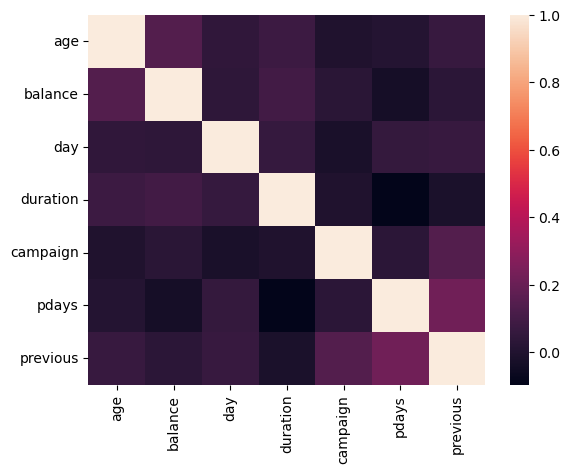

In [205]:
sns.heatmap(df.corr());

We can explore the relationship between age and balance further using pairplots:

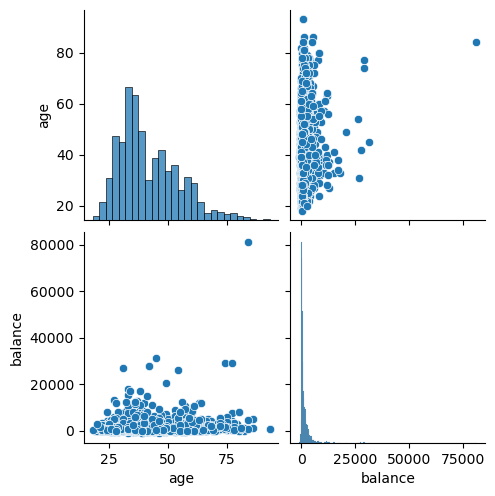

In [206]:
sns.pairplot(data=df[['age','balance']].dropna())
plt.show()

4. Generate at least two plots with the combined distribution of attributes. Draw a short conclusion (approx. 150 words in a markdown cell).
Make sure your conclusions are related to the question you have formulated.


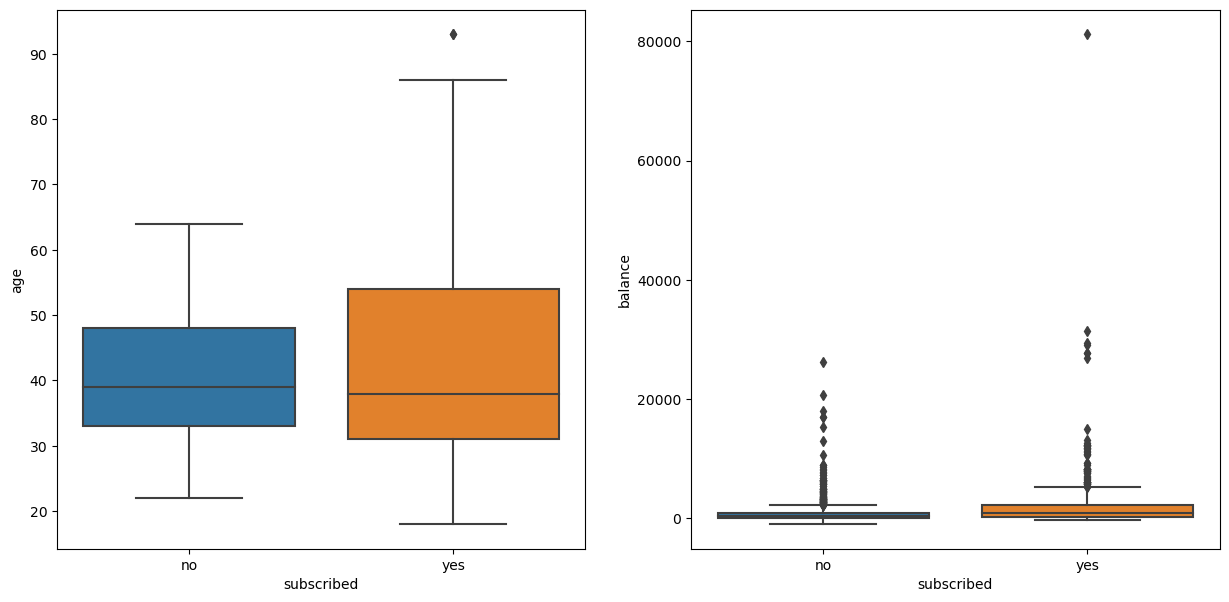

In [207]:
#box plot of age and balance for each subscribed class in sub plots
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.boxplot(x='subscribed', y='age', data=df, ax=ax[0])
sns.boxplot(x='subscribed', y='balance', data=df, ax=ax[1])
plt.show()

In [208]:
df[['marital','subscribed']].value_counts()

marital   subscribed
married   no            610
          yes           501
single    yes           405
          no            269
divorced  no            121
          yes            94
dtype: int64

Text(0, 0.5, 'number of applicants')

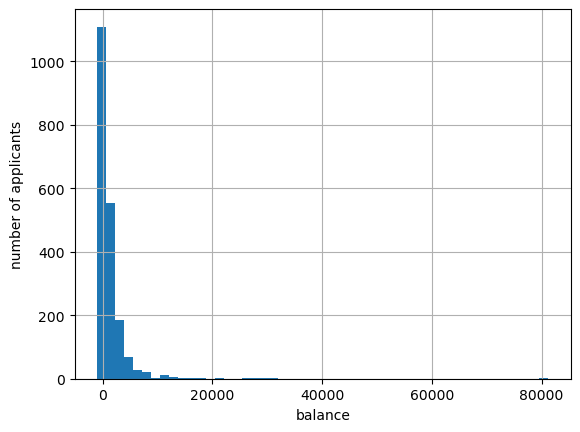

In [209]:
df['balance'].hist(bins=50)
plt.xlabel('balance')
plt.ylabel('number of applicants')

While there is not a significant correlation between age and balance, the boxplots for age and balance further explore this by grouping by those who are subscribed/not subscribed (and consider any possible outliers). While the median is similar for subscribed/not subscribed in both cases, there is a larger range of ages and balances for subscribed.

When considering outliers in balance, while a number have a balance greater than 1.5 times interquartile range, the main outlier is 80000, and removing the others would result in losing other important data for comparison. Removing this however would remove relevent data in the other columns, plus it is very possible for balance to have extreme values, relatively to the mean.

# Task 2: Data Preparation

- encoded all categorical attributes as numerical,
- filled in all missing values,
- applied a scaler to rescale features,
- treated outliers and skewed attribute distribution appropriately,
- created at least one new feature from the existing ones.

In [210]:
#take a backup of original df
df_original = df

## 2a) Encoding categorical attributes

Education and month can both be considered ordinal categories; education increases with experience, starting with primary -> secondary -> tertiary, and months are ordered jan-dec (the order may have limited value for anlysis however it may highlight seasonality throughout the year).

In [212]:
# identify distinct educations
print(df['education'].value_counts())

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64


In [213]:
scale_mapper_education = {
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
}

scale_mapper_month = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}

df['education'] = df['education'].replace(scale_mapper_education).fillna(0)
df['month'] = df['month'].replace(scale_mapper_month).fillna(0)

df.drop(['day'], axis=1, inplace=True)
df.drop(['contact'], axis=1, inplace=True)

df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        0.0      no     2785      no   no   
1996  28.0        admin.   single        2.0      no      127      no   no   
1997  81.0       retired  married        1.0      no     1154      no   no   
1998  46.0      services  married        1.0      no     4343     yes   no   
1999  40.0  entrepreneur  married        2.0      no     6403      no   no   

      month  duration  campaign  pdays  previous poutcome subscribed  
1995      9       327         2     -1         0      NaN        yes  
1996      9      1334         2     -1         0      NaN        yes  
1997      9       231         1     -1         0      NaN        yes  
1998      9       185         1     -1         0      NaN        yes  
1999      9       208         2     -1         0      NaN        yes

# 2b) One-hot encoding
Marital, job and poutcome have no order, therefore they should be one-hot encoded. In this case we are removing the original columns and including columns for records with no value.

In [214]:
df = pd.get_dummies(df, columns=['marital', 'job', 'poutcome'], 
                        dummy_na=True, 
                        drop_first=True)

df.tail()

age  education default  balance housing loan  month  duration  \
1995  20.0        0.0      no     2785      no   no      9       327   
1996  28.0        2.0      no      127      no   no      9      1334   
1997  81.0        1.0      no     1154      no   no      9       231   
1998  46.0        1.0      no     4343     yes   no      9       185   
1999  40.0        2.0      no     6403      no   no      9       208   

      campaign  pdays  ...  job_retired job_self-employed  job_services  \
1995         2     -1  ...            0                 0             0   
1996         2     -1  ...            0                 0             0   
1997         1     -1  ...            1                 0             0   
1998         1     -1  ...            0                 0             1   
1999         2     -1  ...            0                 0             0   

      job_student  job_technician  job_unemployed  job_nan  poutcome_other  \
1995            1               0               0        0               0   
1996            0               0               0        0               0   
1997            0               0               0        0               0   
1998            0               0               0        0               0   
1999            0               0               0        0               0   

      poutcome_success  poutcome_nan  
1995                 0             1  
1996                 0             1  
1997                 0             1  
1998                 0             1  
1999                 0             1  

[5 rows x 29 columns]

# 2c) Missing values

12/2000 age values are missing. Looking at the over values for these 12, there isn't an obvious pattern and temptation is therefore simply to populate with the mean age. As discussed in previous section, mean is chosen over median because the age typically has a guassian distribution.

In [215]:
# df.isna().sum()
df[df['age'].isnull()]

age  education default  balance housing loan  month  duration  campaign  \
456   NaN        3.0      no      917      no   no      2       518         3   
472   NaN        1.0      no      474     yes  yes      2       152         3   
526   NaN        2.0      no     2478     yes   no      1       347         1   
595   NaN        3.0      no     1857      no   no      1       386         1   
597   NaN        2.0     yes      254     yes  yes      1       194         1   
601   NaN        2.0      no      111     yes   no      1        55         1   
605   NaN        3.0      no     1330     yes   no      1        41         2   
744   NaN        3.0      no      -61      no   no      1        90         5   
795   NaN        3.0      no      992     yes   no      5       301         1   
1171  NaN        3.0      no     2812      no   no      8       392         4   
1232  NaN        2.0      no      431      no   no      8       418        11   
1408  NaN        3.0      no      251      no   no      7       537         1   

      pdays  ...  job_retired job_self-employed  job_services  job_student  \
456     212  ...            0                 1             0            0   
472     221  ...            0                 0             0            0   
526     230  ...            0                 0             1            0   
595     168  ...            0                 0             0            0   
597     188  ...            0                 1             0            0   
601     195  ...            0                 0             0            0   
605     261  ...            0                 0             0            0   
744     172  ...            0                 0             0            0   
795      88  ...            0                 0             0            0   
1171    181  ...            1                 0             0            0   
1232    185  ...            0                 0             0            1   
1408     -1  ...            0                 1             0            0   

      job_technician  job_unemployed  job_nan  poutcome_other  \
456                0               0        0               0   
472                0               0        0               0   
526                0               0        0               0   
595                0               0        0               0   
597                0               0        0               0   
601                0               0        0               0   
605                0               0        0               0   
744                0               0        0               0   
795                1               0        0               0   
1171               0               0        0               0   
1232               0               0        0               0   
1408               0               0        0               0   

      poutcome_success  poutcome_nan  
456                  0             0  
472                  0             0  
526                  0             0  
595                  0             0  
597                  0             0  
601                  0             0  
605                  0             0  
744                  0             0  
795                  1             0  
1171                 1             0  
1232                 1             0  
1408                 0             1  

[12 rows x 29 columns]

<Axes: >

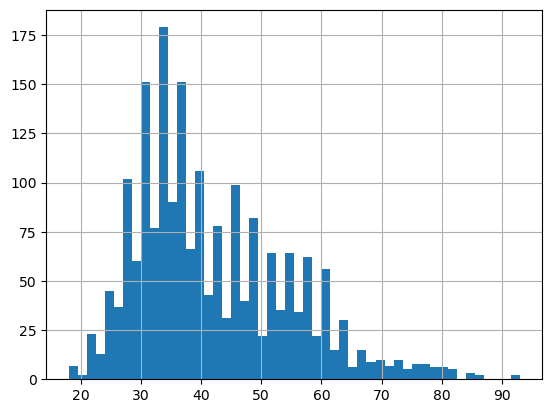

In [216]:
df_original['age'].hist(bins=50)

In [217]:
df['age'].fillna(df['age'].mean(), inplace=True)

# 2d) Rescaling

Values are typically rescaled to improve the performance of the learning algorithms. In this case, balance and duration can have a broad range of values, and will be scaled using the RobustScaler to handle the more extreme values such as balance.

In [218]:
robust_scaler = RobustScaler()
df['balance'] = robust_scaler.fit_transform(df[['balance']])
df['duration'] = robust_scaler.fit_transform(df[['duration']])

df.head()

age  education default   balance housing loan  month  duration  campaign  \
0  32.0        3.0      no -0.110187     yes   no      4  3.094421         2   
1  39.0        2.0      no  0.094941     yes  yes      4 -0.012876         2   
2  59.0        2.0      no  0.335412     yes  yes      4 -0.472103         2   
3  47.0        2.0      no -0.106029     yes  yes      4  0.163090         1   
4  54.0        2.0      no  0.313929     yes   no      4  1.042918         1   

   pdays  ...  job_retired job_self-employed  job_services  job_student  \
0    131  ...            0                 0             0            0   
1    133  ...            0                 0             0            0   
2    239  ...            1                 0             0            0   
3    238  ...            0                 0             0            0   
4    307  ...            1                 0             0            0   

   job_technician  job_unemployed  job_nan  poutcome_other  poutcome_success  \
0               1               0        0               0                 0   
1               1               0        0               0                 0   
2               0               0        0               0                 0   
3               0               0        0               0                 0   
4               0               0        0               0                 0   

   poutcome_nan  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 29 columns]

# 2e) Outliers

By first looking at min/max relative to mean using `df.describe()` we see balance still has outliers, as seen in the box plot above (grouped by subscribed yes/no). A high balance for a small proportion of customers can however be justified, and should be included in the results. From a machine learning perspective, this could negatively impact training however so the log of balance is instead taken to achieve a more even distribution.

<Axes: title={'center': 'balance'}, xlabel='subscribed'>

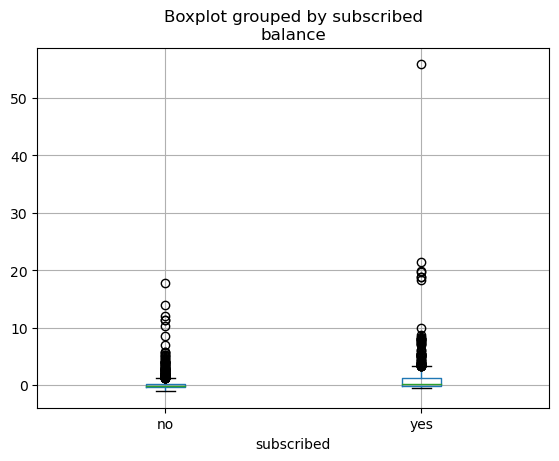

In [219]:
df.describe()
df.boxplot(column='balance', by='subscribed')

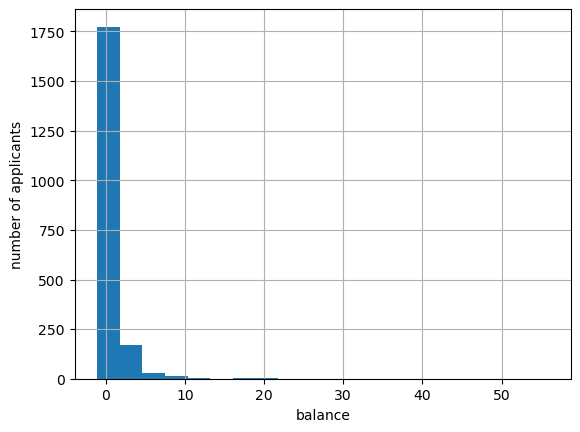

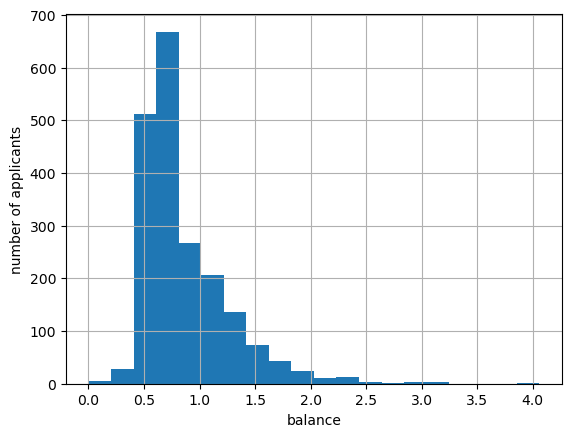

In [220]:
df['balance'].hist(bins=20)
plt.xlabel('balance')
plt.ylabel('number of applicants')
plt.show()

# Use a log transformation to decrease the impact of outliers
df['balance_log'] = np.log(df['balance'] + abs(min(df['balance'])) + 1)

df['balance_log'].hist(bins=20)
plt.xlabel('balance')
plt.ylabel('number of applicants')
plt.show()

Given large range of balances, it makes more sense to apply logarithmic scale to stretch distribution across the range of possible values.

## 2f) New features

Ages are typically better grouped for analysis. This helps reduce noise - ages between 0-18, 18-35, and 35+ for example will typically represent certain demographics, and the different between someone aged 16, and 17 for example could be considered the same, and binning would reduce risk of overfitting. It may also help better capture ouliers.

<Axes: >

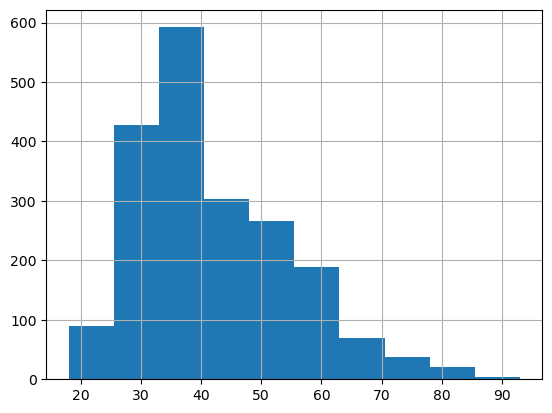

In [225]:
df['age'] = df['age'].hist(bins=10)